# QTM 350 Final Project Blog 
By: Jon Marcus, Brett Kloner, Vicky Liu, Bryant Wise, Jonathan Savdie, Niki Vasan

## Project Overview 
Our project tests the interaction between two AWS Machine Learning APIs: Amazon Polly and Amazon Transcribe. Amazon Polly is a tool that converts text to speech, while Amazon Transcribe is a tool that converts speech to text. In essence, we want to double check the respective efficacy of each ML API by passing in text data to Polly and using its output as an input to Transcribe, which should, in theory, spit out the original text file. 

As part of this project, we are looking to test for potential hidden variables that could impact the efficacy of either API. For Amazon Polly, these might include words of varied origin or spelling, phrases with slang, or other linguistic obstacles that could trip up the text to mp3 exchange. For Amazon Transcribe, we will look at how the different voice IDs of Amazon Polly's output (which vary by accent and gender) impacts the accuracy of the transcriber. 

First, we will provide a quick walkthrough of both APIs. Then, we will explain how we utilized each of them in our project. 


## Amazon Polly
Amazon Polly is a machine learning tool for converting text to speech in the cloud. From the [documentation](https://docs.aws.amazon.com/polly/latest/dg/what-is.html) you will find that:
> Amazon Polly includes a number of Neural Text-to-Speech (NTTS) voices, delivering
ground-breaking improvements in speech quality through a new machine learning approach, thereby
offering to customers the most natural and human-like text-to-speech voices possible.

Let's get started.

### How Amazon Polly Works
From the documentation: 

1. You call one of the speech synthesis methods

2. Provide the text that you want to synthesize

3. Choose one of the Neural Text-to-Speech (NTTS) or Standard Text-to-Speech (TTS) voices

4. Specify an audio output format 

5. Amazon Polly then synthesizes the provided text into a high-quality speech audio stream

### Set Up IAM Role
In order to change the IAM role of our Sagemaker instance, we will need to go to the Sagemaker dashboard, click on "Notebook Instances," then click on the name of the appropriate notebook instance. There, under the heading "Permissions and encryption" click the link to the IAM role ARN. Under permissions, you should see a blue button that says "Attach Policies" similar to this one below.

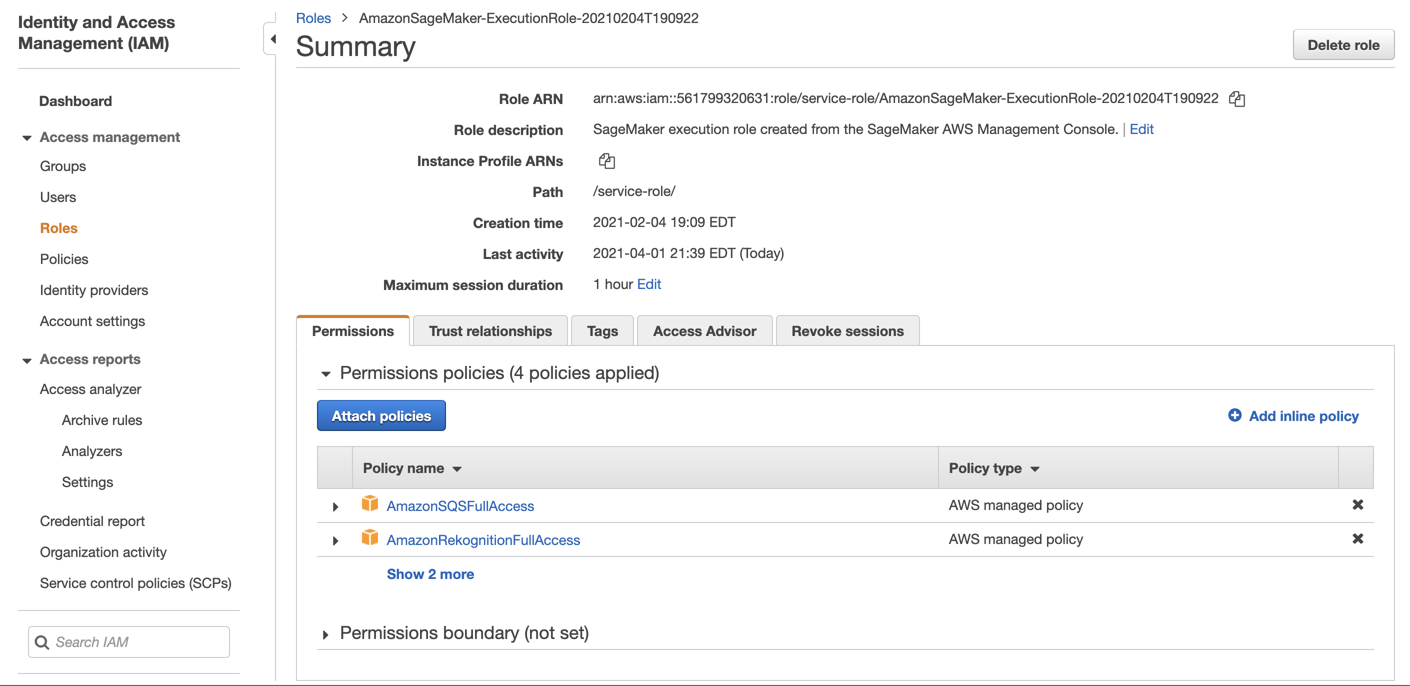

In [1]:
import s3fs
fs = s3fs.S3FileSystem()
file = fs.open('s3://polly-api-niki/permissions.png')
from PIL import Image
image = Image.open(file)
(width, height) = (image.width // 2, image.height // 2)
im_resized = image.resize((width, height))
display(im_resized)

After you click on that button, in the search bar next to the "Filter Policies" label, type in 'Polly' and select the policy name of 'AmazonPollyFullAccess.' Your screen should look similar to the image below.

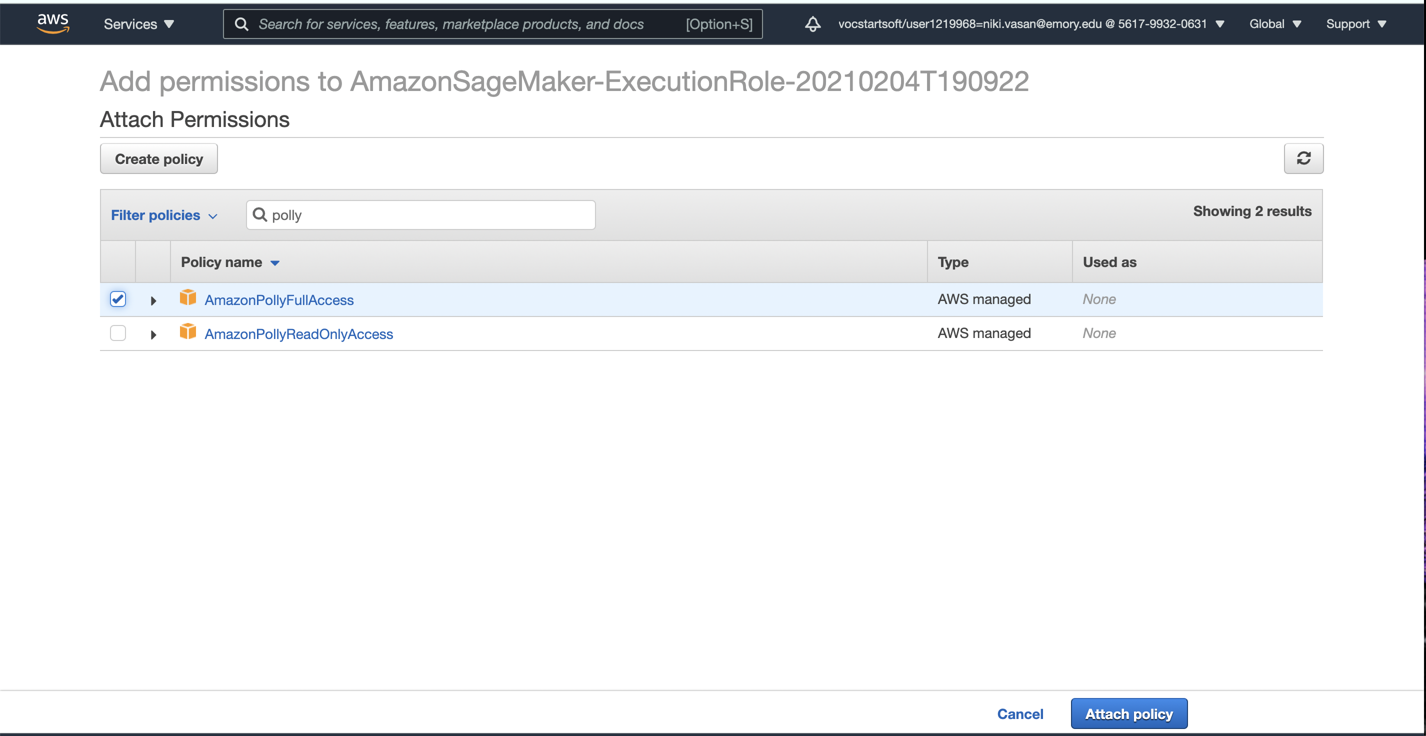

In [2]:
import s3fs
fs = s3fs.S3FileSystem()
file = fs.open('s3://polly-api-niki/fullaccess.png')
from PIL import Image
image = Image.open(file)
(width, height) = (image.width // 2, image.height // 2)
im_resized = image.resize((width, height))
display(im_resized)

Finally, click "Attach Policy."
## Getting started using the console
Before using the Polly service programatically, it can be helpful to understand what it does by walking through examples in the AWS console. You can try that out [here](https://console.aws.amazon.com/polly/home?region=us-east-1).

## Working with the Polly API Programmatically
This can be done graphically via the AWS console, or programaticaly using bash or the Python SDK. The following steps will show you how to do it with the AWS CLI.

In [ ]:
 !aws s3 mb s3://polly-api-niki

You can run the `aws s3 ls` command to list buckets in your account.

In [ ]:
!aws s3 ls

Next, we need to verify the existence of AWS Polly by typing the following command.

In [ ]:
!aws polly help

Great! Now that a description of Polly has appeared along with a (helpful!) list of commands, we know Amazon Polly is available in the AWS CLI, and we can go ahead and try it out.  

We can run the synthesize-speech AWS CLI command to synthesize sample text to an audio file (hi.mp3).

In [ ]:
!aws polly synthesize-speech \
 --output-format mp3 \
 --voice-id Joanna \
 --text 'Hi! I am very excited to learn about Amazon Polly today.' \
 hi.mp3

When we call `synthesize-speech`, we provide 
1) an output format (mp3) 
2) a voice ID (Amazon provides a wide vareity of different voices and accents to choose from within a given language 
3) the sample text for the synthesis

The resulting audio is saved to the hi.mp3 file. We can play the audio like so.

In [ ]:
from IPython.display import *
Audio("hi.mp3", autoplay=True)

You can also get a list of all the available voices Amazon offers via this line of code.

In [ ]:
!aws polly describe-voices

The output is all the different voices available across all languages in a JSON format. It gives you the gender, voice ID, language name and other useful information. 

You can also search for voices based on a specific language. Each language is attached with a language code that can be found [here](https://docs.aws.amazon.com/polly/latest/dg/polly-dg.pdf#getting-started-cli).

For example, here is the code to find all the voices available for Mandarin.

In [ ]:
!aws polly describe-voices \
 --language-code cmn-CN

You can also find this list of language codes via the command line.

In [ ]:
!aws polly describe-voices help

## Amazon Transcribe Overview 
Amazon Transcribe is a machine learning tool for converting speech to text in the cloud. From the [documentation](https://docs.aws.amazon.com/transcribe/latest/dg/transcribe-dg.pdf) you will find that:
> Amazon Transcribe analyzes audio files that contain speech and uses advanced machine learning
techniques to transcribe the voice data into text. You can then use the transcription as you would any
text document.

Let's get started.

## How Amazon Transcribe Works

Amazon Transcribe can interact with many different forms of audio, but in the case, we will be working with simple audio files (mp3). 

From the documentation: 
1. Starts a batch job to transcribe the speech in an audio file to text.

2. Returns a list of transcription jobs that have been started. You can specify the status of the jobs that you want the operation to return. For example, you can get a list of all pending jobs, or a list of completed jobs.

3. Returns the result of a transcription job (in our case, a media file rather than a real-time stream). The response contains a link to a JSON file containing the results.

## Set Up IAM Role
We will need to set up an IAM role again, similar to what we did previously when working with Amazon Polly. As we saw last time, under permissions, you should see a blue button that says "Attach Policies." There, in the search bar next to the "Filter Policies" label, type in 'Transcribe' and select the policy name of 'AmazonTranscribeFullAccess.' Your screen should look similar to the image below.

In [ ]:
import s3fs
fs = s3fs.S3FileSystem()
file = fs.open('s3://polly-api-niki/fullaccess.png')
from PIL import Image
image = Image.open(file)
(width, height) = (image.width // 2, image.height // 2)
im_resized = image.resize((width, height))
display(im_resized)

Finally, click "Attach policy." 

## Getting started using the console
Before using the Transcribe service programatically, it can be helpful to understand what it does by walking through examples in the AWS console. You can try that out [here](https://console.aws.amazon.com/transcribe/home?region=us-east-1#jobs).

## Working with the Transcribe API Programmatically
This can be done graphically via the AWS console, or programaticaly using bash or the Python SDK. The following steps will show you how to do it with the AWS CLI. In order to use CLI, you will need a text editor available and a speech file stored in an s3 bucket with the appropriate permissions.

First, place your mp3 file into your s3 bucket. In this case, I will be working with the sample Polly output produced above (hi.mp3), and I will be placing it in the s3 bucket named 'polly-api-niki' that was created above. This can be done via the command line or by simply downloading the audio file and uploading it into the s3 bucket via the webpage. 

Next, create a JSON file named test-start-command.json that contains the input parameters for the
StartTranscriptionJob (p. 310) operation. Enter a unique name for your transcription job under
"TranscriptionJobName" (I used '350test'). It should look something like this. The 'MediaFileURI' is the location of the audio file within your s3 bucket (i.e. "s3://polly-api-niki/hi.mp3").

In [ ]:
fs = s3fs.S3FileSystem()
file = fs.open('s3://polly-api-niki/transcribecode.png')
image = Image.open(file)
(width, height) = (image.width // 2, image.height // 2)
im_resized = image.resize((width, height))
display(im_resized)

We can use the s3 bucket we made previously and use the same verification method to ensure transcribe exists.

In [ ]:
!aws transcribe help

Great! Now that a description of Transcribe has appeared along with a (helpful!) list of commands, we know Amazon Transcribe is available in the AWS CLI, and we can go ahead and try it out. We first run the following command:

In [ ]:
!aws transcribe start-transcription-job \
 --region us-east-1 \
 --cli-input-json file://test-start-command.json

To list the transcription jobs, you can run the following command: 

In [ ]:
!aws transcribe list-transcription-jobs \
 --region us-east-1 \
 --status IN_PROGRESS

When the job has a status of 'COMPLETED', you may access the results by typing the following command:

In [ ]:
!aws transcribe get-transcription-job \
 --region us-east-1 \
 --transcription-job-name "350test"

In order to access the transcribed output, copy and paste the URI into your browser. You can then download the JSON file that contains the text. You should see something similar to the image below.

In [ ]:
fs = s3fs.S3FileSystem()
file = fs.open('s3://polly-api-niki/jsonoutput.png')
image = Image.open(file)
(width, height) = (image.width // 2, image.height // 2)
im_resized = image.resize((width, height))
display(im_resized)

This completes the first part of our blog that explains what each product is, and what it does. Now we will move on to discussing the steps we used in the actual project. 

 ## Using Amazon Polly in Our Project

### Input
Here are some examples of the inputs that we use to test the efficacy of Polly.
Unlike in the previous walkthrough of Polly, we had to pass a batch of inputs into the API, rather than just one. To do this, we called Polly to synthesize the speech into the format of a mp3 with a specific voice ID and input text. We prepared 10 sentences as our input text. Each sentence was inputted 5 times for the 5 different voice IDs utilized.

In [ ]:
!aws polly synthesize-speech \
    --output-format mp3 \
    --voice-id Joanna \
    --text 'Dylan has a lot of complex fundamentals fluctuating in his brain due to his ADHD.' \
    speak1.mp3

!aws polly synthesize-speech \
    --output-format mp3 \
    --voice-id Nicole \
    --text 'Dylan has a lot of complex fundamentals fluctuating in his brain due to his ADHD.' \
    speak11.mp3

!aws polly synthesize-speech \
    --output-format mp3 \
    --voice-id Brian \
    --text 'Dylan has a lot of complex fundamentals fluctuating in his brain due to his ADHD.' \
    speak21.mp3

!aws polly synthesize-speech \
    --output-format mp3 \
    --voice-id Raveena \
    --text 'Dylan has a lot of complex fundamentals fluctuating in his brain due to his ADHD.' \
    speak31.mp3

!aws polly synthesize-speech \
    --output-format mp3 \
    --voice-id Geraint \
    --text 'Dylan has a lot of complex fundamentals fluctuating in his brain due to his ADHD.' \
    speak41.mp3

### Output 
The output of this process is a batch of mp3 files of the text to speech translation in reproduced in varied Polly Voice IDs. Each mp3 file that was created was imported and auto-played. The following code displays the 5 mp3 files created of the same sentence as the previous example, but using different voice IDs. 

In [ ]:
from IPython.display import *
Audio("speak1.mp3", autoplay=True)

from IPython.display import *
Audio("speak11.mp3", autoplay=True)

from IPython.display import *
Audio("speak21.mp3", autoplay=True)

from IPython.display import *
Audio("speak31.mp3", autoplay=True)

from IPython.display import *
Audio("speak41.mp3", autoplay=True)

## Using Amazon Transcribe in Our Project 

### Input
The next step in the process was using the outputs of Polly to test the efficacy of Transcribe. Here are the examples of the inputs that we used from earlier. 

In [ ]:
from IPython.display import *
Audio("speak1.mp3", autoplay=True)

from IPython.display import *
Audio("speak11.mp3", autoplay=True)

from IPython.display import *
Audio("speak21.mp3", autoplay=True)

from IPython.display import *
Audio("speak31.mp3", autoplay=True)

from IPython.display import *
Audio("speak41.mp3", autoplay=True)

Unlike our use of Polly, we had to pass each input (audio file) individually to Transcribe rather than use a batch.  

### Output 
The output of this process is a batch of text files of the speech to text translation of various Voice IDs that should, in theory, match the original inputs to Polly. 

In [6]:
output_text = ['Dylan has a lot of complex fundamentals fluctuating in his brain due to his 80 H. D.',
              'Ma, Can. We have Champ alive for supper tonight.', 'Lizabeth chose to go into a hist, a technologist educational program to learn more about diagnosing diseases and abnormalities.',
              'Amy was having deja boo and watching a Peruvian documentary on Netflix.', 'As usual. You have a wonderful smorgasbord of need sites.',
              'King George. The fourth was King of the United Kingdom of Great Britain and Ireland and King of Hanover.',
              'I had to go see my own trying to learn biologist because of my ear infection.', 'Can you pass me the Worcestershire sauce, please?',
              'I got totally sozzled with Dyan eyes is the Greek god of wine and partying.', 'The quick brown fox jumps over the lazy dog.',
              'Dylan has a lot of complex fundamentals fluctuating in his brain due to his a DHD.',
              'Ma, Can We have jumper live for supper tonight.', 'At least with chose to go into a history Technologist educational program to learn more about diagnosing diseases and abnormalities.',
              'Amy was having deja vu when watching a Peruvian documentary on Netflix.', 'As usual. You have a wonderful smorgasbord of need sites.',
              'King George. The fourth was King of the United Kingdom of Great Britain and Ireland and King of Hanover.', 'I had to go see my Auteuil. I know Larry in college is because of my ear infection.',
            'Can you pass me the Worcestershire sauce, please?', 'I got totally sozzled with di Anizers, the Greek god of wine and partying.',
              'The quick brown fox jumps over the lazy dog.', 'Dylan has a lot of complex fundamentals fluctuating in his brain due to his a DHD.',
              'Ma can. We have jumped life for supper tonight.', 'Elizabeth chose to go into a history of technologist educational program to learn Maura about diagnosing diseases and abnormalities.',
              'Amy was having deja vu when watching a Peruvian documentary on Netflix.', 'As usual. You have a wonderful smorgasbord of need sites.',
              'King George. The fourth was King of the United Kingdom of Great Britain and Islands and King of Hanover.',
              'Had to go see my Oto Rhino Leerink ologists because of my ear infection.', 'Can you pass me the Worcestershire sauce, please?',
              'Got totally sozzled with Dyan Isis, the Greek god of wine and partying.', 'The quick brown fox jumps over the lazy dog.',
              'Dylan has a lot of complex fundamentals fluctuating in his brain due to his A D. H. D.', 'Mom, can we have generally off for supper tonight?',
              'Elizabeth chose to go into a history technologist educational program to learn more about diagnosing diseases and abnormalities.',
              'Amy was having deja vu when watching a Peruvian documentary on Netflix.', 'As usual. You have a wonderful smorgasbord of need sites.',
              'King George. The fault was King of the United Kingdom of Great Britain and Ireland and King of Hanover.',
              'Had to go see my Oto rhino layering Ecologist because of my ear infection.', 'Can you pass me the Worcestershire sauce, please?',
              'I got totally sozzled with Dyan eyes is the Greek god of wine and partying.', 'The quick brown fox jumps over the lazy dog.',
              'Dylan has a lot of complex fundamentals fluctuating in his brain due to his a DHD.', 'Mama, can we have Jim Blier for separate in night?',
              'Elizabeth chose to go into a history technologist educational program to learn more about diagnosing diseases and abnormalities.',
              'Amy was having deja vu when watching a Peruvian documentary on Netflix.', 'As usual. You have a wonderful smoke a sport of need sites.',
              'King George. The fourth was King of the United Kingdom of Great Britain and Ireland and King of Hanover.', 'I have to go see my Oh, toy. I know Larry Ecologist because of my ear infection.', 
               'Can you pass me the worst dishes source, please.', 'Got totally sozzled with dine Isis, the Greek god of wine and partying.',
              'The quick brown fox jumps over the lazy dog.']

## Analyzing the Output

First, we displayed the output in the form of a table, as is shown below. 

In [7]:
sentences = ["Dylan has a lot of complex fundamentals fluctuating in his brain due to his ADHD.",
             "Ma, can we have jambalaya for supper tonight?", 
            "Elizabeth chose to go into a histotechnologist educational program to learn more about diagnosing diseases and abnormalities.",
            "Amiee was having déjà vu when watching a Peruvian documentary on Netflix.", 
             "As usual, you have a wonderful smorgasbord of neat sites", 
             "King George IV was King of the United Kingdom of Great Britain and Ireland and King of Hanover.",
             "I had to go see my Otorhinolaryngologist because of my ear infection.",
             "Can you pass me the Worcestershire sauce, please?",
             "I got totally zozzled with Dionysus, the greek god of wine and partying.",
             "The quick brown fox jumps over the lazy dog.",
             "Dylan has a lot of complex fundamentals fluctuating in his brain due to his ADHD.",
             "Ma, can we have jambalaya for supper tonight?", 
            "Elizabeth chose to go into a histotechnologist educational program to learn more about diagnosing diseases and abnormalities.",
            "Amiee was having déjà vu when watching a Peruvian documentary on Netflix.", 
             "As usual, you have a wonderful smorgasbord of neat sites", 
             "King George IV was King of the United Kingdom of Great Britain and Ireland and King of Hanover.",
             "I had to go see my Otorhinolaryngologist because of my ear infection.",
             "Can you pass me the Worcestershire sauce, please?",
             "I got totally zozzled with Dionysus, the greek god of wine and partying.",
             "The quick brown fox jumps over the lazy dog.",
             "Dylan has a lot of complex fundamentals fluctuating in his brain due to his ADHD.",
             "Ma, can we have jambalaya for supper tonight?", 
            "Elizabeth chose to go into a histotechnologist educational program to learn more about diagnosing diseases and abnormalities.",
            "Amiee was having déjà vu when watching a Peruvian documentary on Netflix.", 
             "As usual, you have a wonderful smorgasbord of neat sites", 
             "King George IV was King of the United Kingdom of Great Britain and Ireland and King of Hanover.",
             "I had to go see my Otorhinolaryngologist because of my ear infection.",
             "Can you pass me the Worcestershire sauce, please?",
             "I got totally zozzled with Dionysus, the greek god of wine and partying.",
             "The quick brown fox jumps over the lazy dog.",
             "Dylan has a lot of complex fundamentals fluctuating in his brain due to his ADHD.",
             "Ma, can we have jambalaya for supper tonight?", 
            "Elizabeth chose to go into a histotechnologist educational program to learn more about diagnosing diseases and abnormalities.",
            "Amiee was having déjà vu when watching a Peruvian documentary on Netflix.", 
             "As usual, you have a wonderful smorgasbord of neat sites", 
             "King George IV was King of the United Kingdom of Great Britain and Ireland and King of Hanover.",
             "I had to go see my Otorhinolaryngologist because of my ear infection.",
             "Can you pass me the Worcestershire sauce, please?",
             "I got totally zozzled with Dionysus, the greek god of wine and partying.",
             "The quick brown fox jumps over the lazy dog.",
             "Dylan has a lot of complex fundamentals fluctuating in his brain due to his ADHD.",
             "Ma, can we have jambalaya for supper tonight?", 
            "Elizabeth chose to go into a histotechnologist educational program to learn more about diagnosing diseases and abnormalities.",
            "Amiee was having déjà vu when watching a Peruvian documentary on Netflix.", 
             "As usual, you have a wonderful smorgasbord of neat sites", 
             "King George IV was King of the United Kingdom of Great Britain and Ireland and King of Hanover.",
             "I had to go see my Otorhinolaryngologist because of my ear infection.",
             "Can you pass me the Worcestershire sauce, please?",
             "I got totally zozzled with Dionysus, the greek god of wine and partying.",
             "The quick brown fox jumps over the lazy dog."
            ]
voiceID = ["Joanna", "Joanna", "Joanna", "Joanna", "Joanna", "Joanna", "Joanna", "Joanna", "Joanna", "Joanna", "Nicole", "Nicole","Nicole",
          "Nicole","Nicole","Nicole","Nicole","Nicole","Nicole", "Nicole", "Brian", "Brian","Brian","Brian","Brian","Brian","Brian","Brian",
          "Brian","Brian", "Raveena", "Raveena", "Raveena", "Raveena", "Raveena", "Raveena", "Raveena", "Raveena", "Raveena", "Raveena", "Geraint",
           "Geraint", "Geraint", "Geraint", "Geraint", "Geraint", "Geraint", "Geraint", "Geraint", "Geraint"]
gender = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1]
results = [0,0,0,0,0,1,0,1,0,1,1,0,0,1,0,1,0,1,0,1,1,0,0,1,0,0,0,1,0,1,1,0,0,1,0,0,0,1,0,1,1,0,0,1,0,1,0,0,0,1]

In [8]:
import pandas as pd
df=pd.DataFrame({'Sentence':sentences, 'VoiceID':voiceID, 'Results':results, 'Output Text':output_text, 'Gender':gender})
df

,Sentence,VoiceID,Results,Output Text,Gender
0,Dylan has a lot of complex fundamentals fluctu...,Joanna,0,Dylan has a lot of complex fundamentals fluctu...,0
1,"Ma, can we have jambalaya for supper tonight?",Joanna,0,"Ma, Can. We have Champ alive for supper tonight.",0
2,Elizabeth chose to go into a histotechnologist...,Joanna,0,"Lizabeth chose to go into a hist, a technologi...",0
3,Amiee was having déjà vu when watching a Peruv...,Joanna,0,Amy was having deja boo and watching a Peruvia...,0
4,"As usual, you have a wonderful smorgasbord of ...",Joanna,0,As usual. You have a wonderful smorgasbord of ...,0
5,King George IV was King of the United Kingdom ...,Joanna,1,King George. The fourth was King of the United...,0
6,I had to go see my Otorhinolaryngologist becau...,Joanna,0,I had to go see my own trying to learn biologi...,0
7,"Can you pass me the Worcestershire sauce, please?",Joanna,1,"Can you pass me the Worcestershire sauce, please?",0
8,"I got totally zozzled with Dionysus, the greek...",Joanna,0,I got totally sozzled with Dyan eyes is the Gr...,0
9,The quick brown fox jumps over the lazy dog.,Joanna,1,The quick brown fox jumps over the lazy dog.,0


Next, in order to analyze the output, we used multivariate regression to determine if Voice ID (accent) and word/phrase origin affect the ability of Transcribe to match the input provided to Polly. 

In our regression, we examined the voice IDs and gender. 
In our results vector, we have two values: 0 for no match and 1 for match. 
For gender, we created a vector where 0 is female and 1 is male.

From our dataframe that is organized by Voice ID, we ran a chi-squared test for homogeneity to examine the effects of Voice ID on how likely a match is using the mean matches, a decimal from 0 to 1. 

In [ ]:
import statsmodels.formula.api as smf
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

From this contingency table, we are able to explore whether the voice ID and the accuracy of the results are independent. Each row adds up to 1, with the values denoting the fraction of each voice ID matching or not matching. 

In [11]:
contingency_table = pd.crosstab(df['VoiceID'], df['Results'], normalize='index')
contingency_table

Results,0,1
VoiceID,,
Brian,0.6,0.4
Geraint,0.6,0.4
Joanna,0.7,0.3
Nicole,0.5,0.5
Raveena,0.6,0.4


We calculated our p-value to be approximately 0.99, rounding up to 1.00, and is not statistically significant.
Thus, we have strong evidence for our null hypothesis that each voice ID has the same likelihood of a "match" and do not reject the null hypothesis. 

In [12]:
c,p,dof,expected = chi2_contingency(contingency_table)
p

0.9991556844886856

In this contingency table, we used Gender instead of voice ID to test the null hypothesis that each gender has the same likelihood of a "match." 

In [20]:
contingency_table2 = pd.crosstab(df['Gender'], df['Results'], normalize='index')
contingency_table2

Results,0,1
Gender,,
0,0.6,0.4
1,0.6,0.4


We calculated our p-value to be approximately 1.0, and is not statistically significant.
Thus, we have strong evidence for our null hypothesis that each gender has the same likelihood of a "match" and do not reject the null hypothesis. 

In [21]:
c,p,dof,expected = chi2_contingency(contingency_table2)
p

1.0

### Conclusions

Based off of our chi-square tests for homoegneity and contingency tables for voice ID and gender, we find that the respective variables have the same likelihood of a "match." The variables voice ID and gender did not seem to have an impact on the accuracy of Amazon Transcribe. 

The Transcribe algorithm did not perform to what we had expected as we believed that it would pick up the mp3 files created by Polly more accurately, but that did not happen for all of our inputs. Thus, we believe that of the two APIs we worked with, Amazon Transcribe had lower efficacy.